# Final Machine Unlearning Notebook

This notebook contains the complete implementation for machine unlearning experiments.

## Imports

In [4]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from tqdm import tqdm

## Dataset Generation: Multi-Class Spirals Dataset

In [5]:
# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate multi-class spirals dataset
N = 300  # Samples per class
num_classes = 4  # Number of spiral classes

all_data = []

for class_idx in range(num_classes):
    # Generate theta values
    theta = np.sqrt(np.random.rand(N)) * 2 * pi
    
    # Calculate the angle offset for this spiral
    angle_offset = (2 * pi * class_idx) / num_classes
    
    # Generate spiral with rotation
    r = 2 * theta + pi
    
    # Apply rotation to spread spirals evenly
    x = np.cos(theta + angle_offset) * r
    y = np.sin(theta + angle_offset) * r
    
    # Stack coordinates
    data = np.array([x, y]).T
    
    # Add noise
    data = data + np.random.randn(N, 2) * 0.5
    
    # Add labels
    labeled_data = np.append(data, np.full((N, 1), class_idx), axis=1)
    all_data.append(labeled_data)

# Combine all classes
res = np.vstack(all_data)
np.random.shuffle(res)

# Save to CSV
np.savetxt("spirals_dataset.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

print(f"Dataset shape: {res.shape}")
print(f"Total samples: {len(res)}")
print(f"Number of classes: {num_classes}")
for i in range(num_classes):
    print(f"Class {i} samples: {np.sum(res[:, 2] == i)}")

Dataset shape: (1200, 3)
Total samples: 1200
Number of classes: 4
Class 0 samples: 300
Class 1 samples: 300
Class 2 samples: 300
Class 3 samples: 300


## Visualize the Multi-Class Spirals Dataset

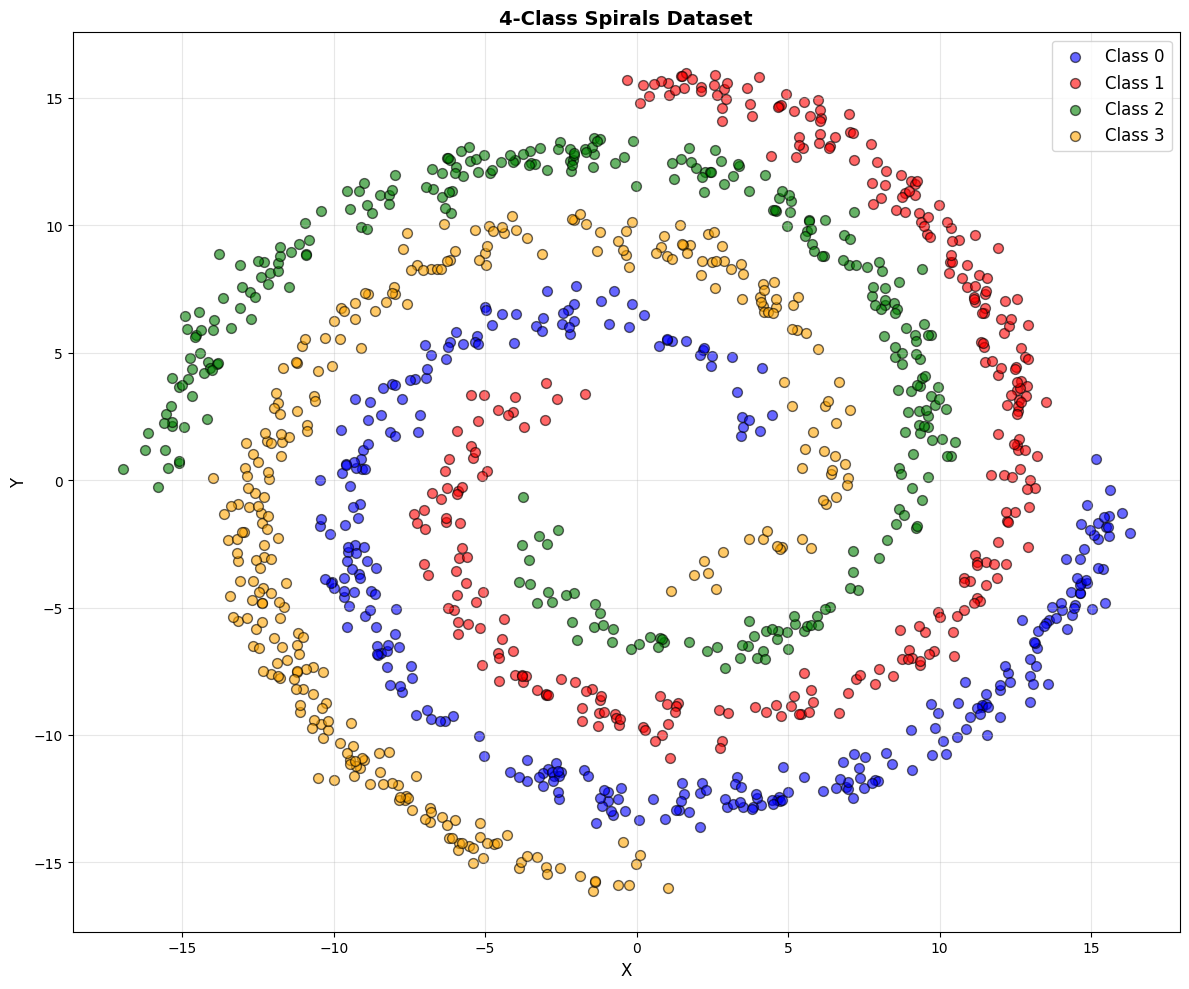

In [6]:
# Visualize the spirals with different colors for each class
plt.figure(figsize=(12, 10))

# Define colors for each class
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

for class_idx in range(num_classes):
    class_data = res[res[:, 2] == class_idx]
    plt.scatter(class_data[:, 0], class_data[:, 1], 
                c=colors[class_idx % len(colors)], 
                label=f'Class {class_idx}', 
                alpha=0.6, 
                edgecolors='k', 
                s=50)

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title(f'{num_classes}-Class Spirals Dataset', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()